<!-- <a href="https://colab.research.google.com/github/ai2ys/Covid-19-EDA/blob/master/CSSE_Covid_19_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>-->

# Custom plots for COVID-19 data

Using the John Hopkins CSSE COVID-19 data:
https://github.com/CSSEGISandData/COVID-19
<br> 
From the 24 March 2020 on the here used time series are deprecated, have a look at the following README.md file [https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/README.md](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/README.md)


Using list of countries by population from Wikipedia:
https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)


In [3]:
from csse_covid19 import Csse_covid19, ScaleType
from ipywidgets import interact,FloatSlider,IntSlider, VBox
from ipywidgets import widgets 
from enum import Enum

num_countries = 10
type_current = Csse_covid19.Confirmed
countries = type_current.get_top_countries()
slider_top_n = IntSlider(min=1, max=20, value=num_countries, description='Top X')
layer = None
select_type = widgets.Select(
    options = [
        Csse_covid19.Confirmed, 
        Csse_covid19.Deaths
    ],
    value=type_current,
    rows=2,
    description='Diagram',
    disabled=False
)
select_scale = widgets.Select(
    options = [
        ScaleType.Linear,
        ScaleType.Log_10,
    ],
    value=ScaleType.Log_10,
    rows=2,
    description='Y scale',
    disabled=False
)
toggle_normalize = widgets.ToggleButton(
    value=False,
    description='Normalize using population [in millions]',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Normalize using population',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

def plot(select_type, top_n, select_scale, 
         toggle_normalize
        ):
    countries = select_type.get_top_countries(top_n)
    name = '{}_top{}_{}.png'.format(select_type.name, top_n, select_scale.name)
    layer = select_type.alt_plot(countries,sort_legend=True, day_delta=2,
                         scale_type=select_scale, 
                         normalize_by_population=toggle_normalize)
            
#vbox = VBox([select, slider_top_n] )  
interact(plot, 
         select_type=select_type, 
         top_n=slider_top_n,
         select_scale=select_scale,
         toggle_normalize=toggle_normalize,
        )


interactive(children=(Select(description='Diagram', options=(<Csse_covid19.Confirmed: (<Covid19_status.Confirm…

<function __main__.plot(select_type, top_n, select_scale, toggle_normalize)>

In [2]:
from ipywidgets import interact,FloatSlider,IntSlider, VBox, Checkbox, HBox
from ipywidgets import widgets 

countries = []
c_dict = {}
def changed(b):
    if b.name == 'value':
        c_dict[b.owner.description] = b.owner.value
    #  Csse_covid19.Confirmed.alt_plot([k for k,v in c_dict.items() if v])


#top x count
top_number = 10

countries = Csse_covid19.Confirmed.get_top_countries(top_number)
vbox1 = VBox()
vbox2 = VBox()
boxes = []
for c in countries:
    c_dict[c] = True
    box = Checkbox(True, description=c)
    box.observe(changed)
    boxes.append(box)

half = len(boxes)//2
vbox1 = VBox(boxes[:half])
vbox2 = VBox(boxes[half:])
hbox = HBox([vbox1, vbox2])
hbox

['China', 'Italy', 'US', 'Spain', 'Germany', 'Iran', 'France', 'Switzerland', 'Korea, South', 'United Kingdom']


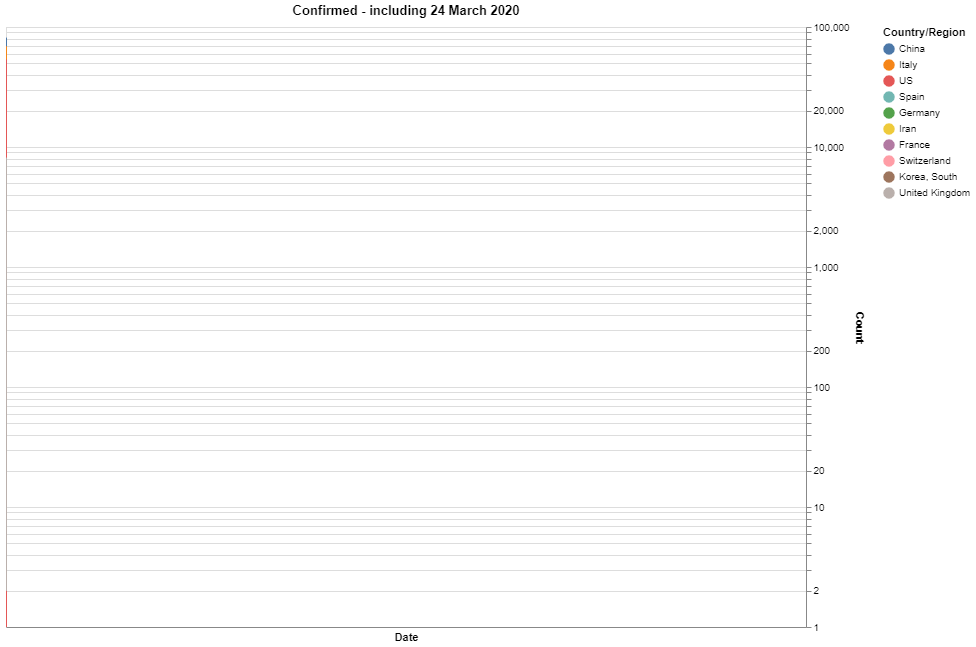

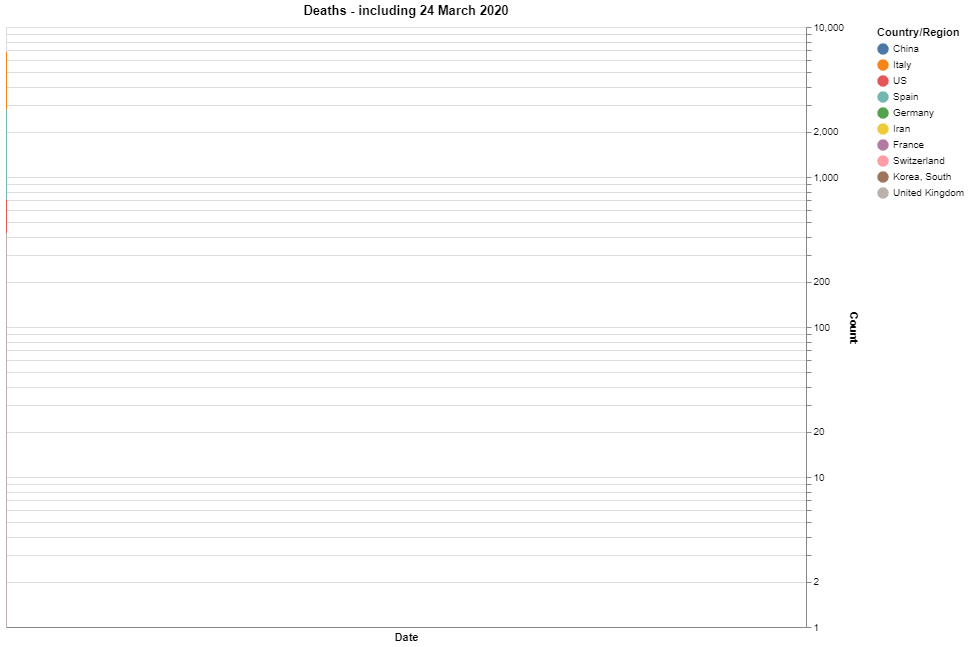

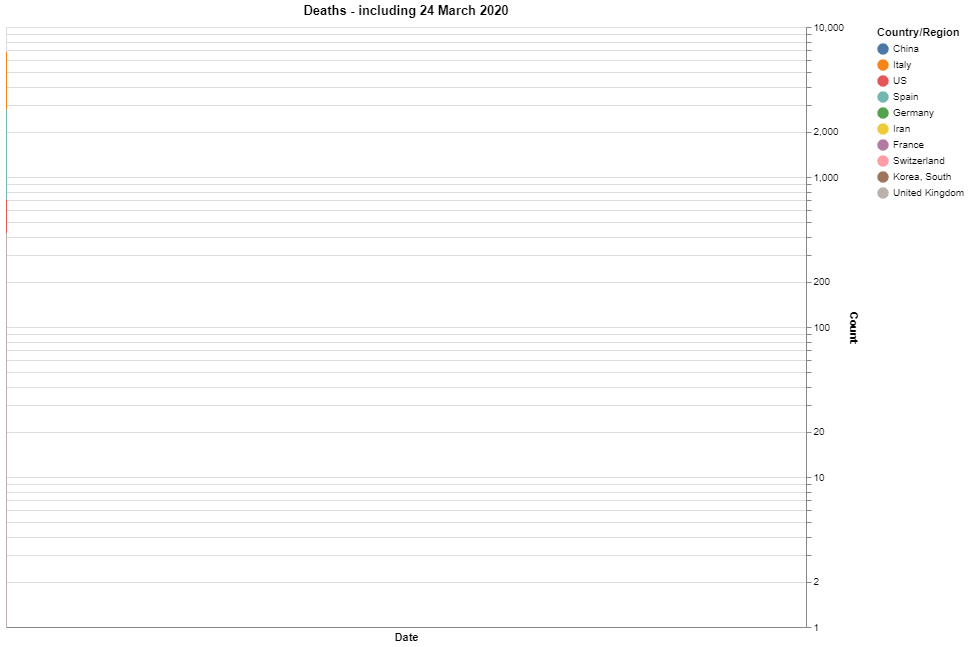

In [3]:
countries = []
for box_list in hbox.children:
    for box in box_list.children:
        if box.value:
             countries.append(box.description)
print(countries)
sort_legend=False
scale_type=ScaleType.Log_10
Csse_covid19.Confirmed.alt_plot(countries, sort_legend=sort_legend, scale_type=scale_type)
Csse_covid19.Deaths.alt_plot   (countries, sort_legend=sort_legend, scale_type=scale_type)
